# Logistic Regression from Scratch in Python
logistic regression is a generalised linear model that we can use to model or predict categorical(supervised learning?) outcome variables. 
E.g. We use logistic regression to predict whether someone will be denied or approved for a loan, not predicting the value of a house.

### How does it work?
Find the weight that maximise the likelihood of producing our given response variable. 

Since the likelihood maximiration in logistic regression doesn't have a closed form solution, I'll solve the optimiration problem with gradient ascent. Gradient ascent is the same as gradient descent, except I'm maximising instead of minimising a function.

## Generating Data
Gonna use simulated data. Can easily simulate separable data by sampling from a mulitvariate normal distibution.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12) 
num_observations = 5000

x1 = np.random.multivariate_normal([0,0], [[1, .75], [.75, 1]], num_observations)
x2  = np.random.multivariate_normal([1,4], [[1, .75], [.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32) # Stack vector vertically, with x1, x2, as float 32
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations))) # Stack vector horizontally, zeros(5000) and ones(5000)


#### My note: From what I'm seeing:
This is actually quite technical. They are using multivariate normal distribution

// **Setting a seed**. Not exactly sure what it does but it make random values fixed. So np.random.rand(x) be different evey times but adding the seed it's random but compiling it again will result in same values.
Pretty much -> pseudo-random numbers “appear random, but they are really predetermined”.

// **np.random.multivariate_normal** -> Draw random samples from a multivariate normal distribution
Lots of maths intense here. From what i got
univariate distribution/normal distribution is your normal bell shaped in highschool stat
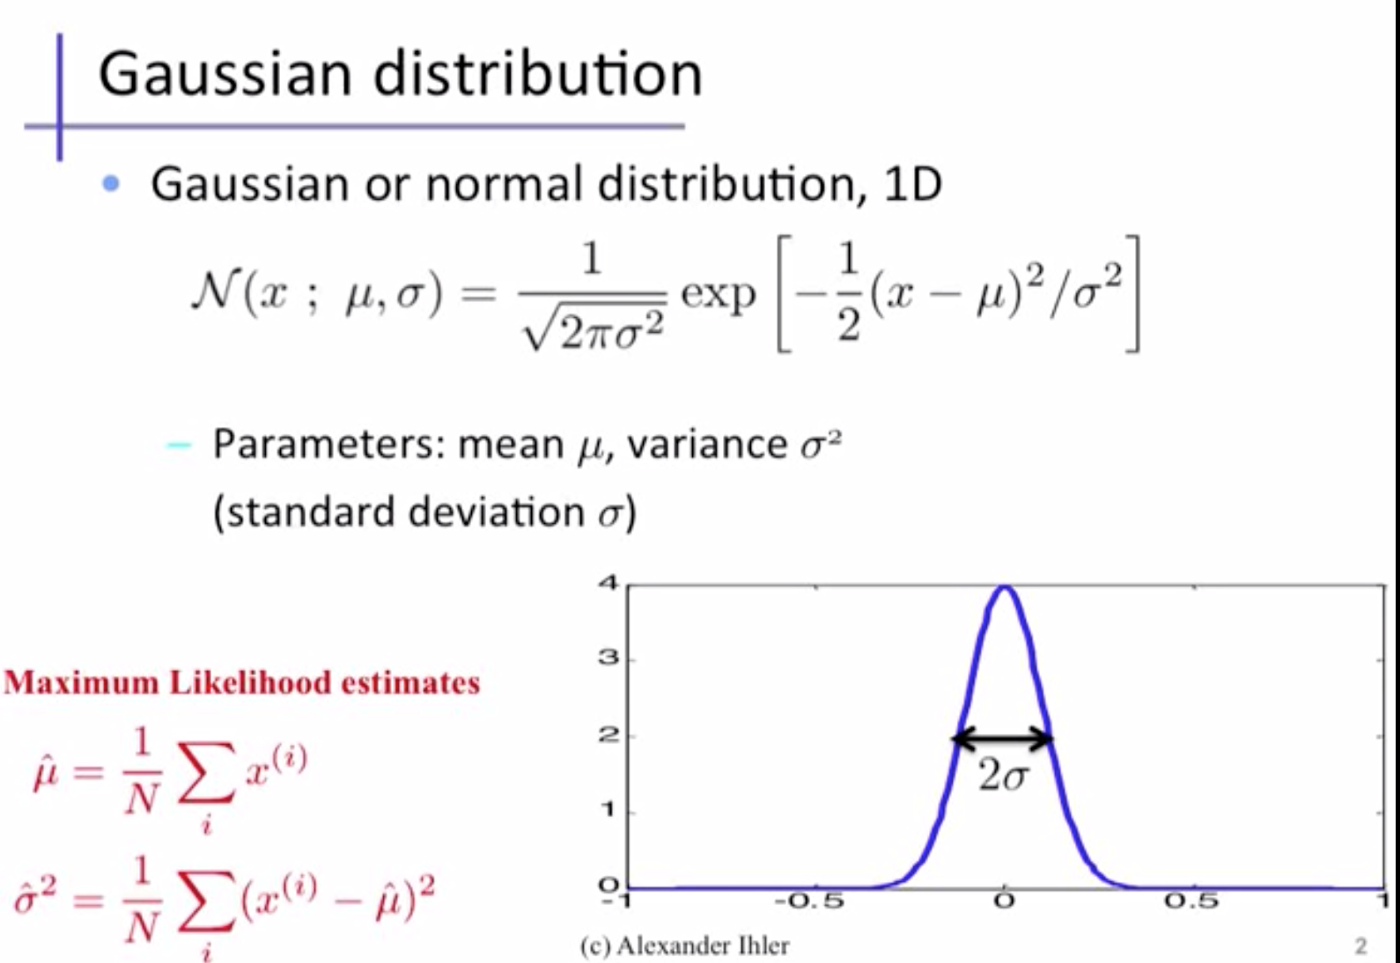

Then multivariate means a normal distribution to higher dimensions?


numpy.random.multivariate_normal(mean, cov[, size])
mean -> 1-D array = [0,0], [1,4]
cov -> 2-D array_like, of shape (N, N) [[1, .75], [.75,1]], [[1, .75], [.75, 1]] 
size -> 5000

// **x1 x2** is random values with transpose cov to each other?

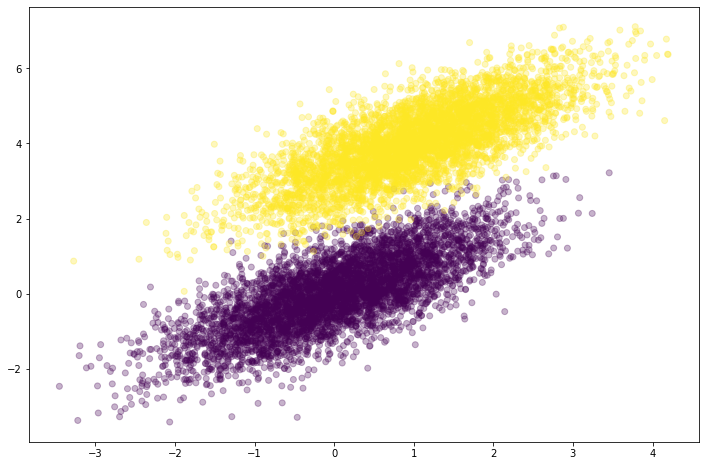

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], c = simulated_labels, alpha = .3)
# Plot it out 

### Pick a Link Function
Generalised linear models usually transform a linear model of the predictors by using a link function
In logistic regression, the link function it the **sigmoid**.
A **Sigmoid function** is a mathematical function which has a characteristic S-shaped curve, logistic function, the hyperbolic tangent, and the arctangent.

Useful because it can be used to **convert real numbers to a probability**.
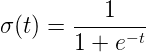
**Output** between 0 to 1

In [39]:
def sigmoid(scores):
    return 1/(1 + np.exp(-scores))


### Maximising the Likelihood
Need equations for the likelihood and the gradient of the likelihood.
Likelihood for **binary classification** can be reduced to a fairly intuitive form by switching to the **log-likelihood**.
Wouldn't affect the weights parameter estimation because log transformations are monotonic.
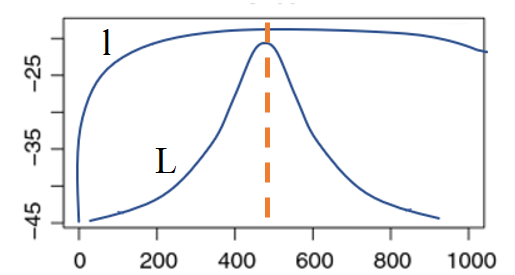
l) is the maxmimum log-likelihood we need compared to L) just the normal likelihood maximum.



It measures how well a particular model fits the data.

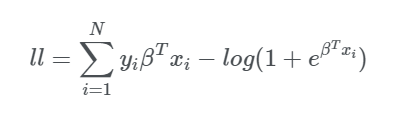
**Where:** $$y$$is the target class (0 or 1), $$x_i$$ is an individual data point, and $$\beta$$ is the weights vector

In [35]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target*scores - np.log(1 + np.exp(scores)))
    return ll

### Calculating the Gradient
Need an equation for the gradient of the log-likelihood. By taking the derivative the the equation above and **reformulating in matrix form**, the gradient becomes: 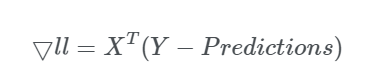


In [36]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept: ## if true 
        intercept = np.ones((features.shape[0], 1)) ## Create variable intercept and change it origihal shape with ones
        features = np.hstack((intercept, features)) ## features is now stack horizontally with intercept ones
        
    weights = np.zeros(features.shape[1]) ## zeors but not sure what shape[1] really does
     
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
            
    return weights
        

In [26]:
weights = logistic_regression(simulated_separableish_features, simulated_labels, num_steps = 300000, learning_rate = 5e-5, add_intercept = True)

-4346.264779152365
-148.7067227680535
-142.96493623107835
-141.54530307157367
-141.060319659308
-140.87031585891606
-140.79025912753815
-140.75505002269915
-140.7391450318095
-140.7318349891588
-140.72843666694826
-140.7268447125533
-140.72609508950472
-140.72574086052302
-140.72557306887177
-140.72549345786172
-140.72545564250743
-140.72543766614336
-140.72542911609156
-140.7254250479478
-140.725423111817
-140.72542219020232
-140.7254217514527
-140.72542154256132
-140.7254214431011
-140.72542139574284
-140.7254213731925
-140.7254213624546
-140.72542135734136
-140.72542135490647


### Comparing with Sk-Learn's Logistic Regression
sk-learn's logistic regression function is known to be correct implementation. Since sk-learn’s `LogisticRegression` automatically does L2 regularization (did do in ours), set C=1e15 to essentially turn off regularization.

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, C=1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print (clf.intercept_, clf.coef_)
print (weights)

[-14.09231079] [[-5.05902155  8.28959202]]
[-14.09225541  -5.05899648   8.28955762]


Nearly match with our code. If only the algorithm get **trained longer and with small enough learning rate**, they would eventually match. Because gradient ascent on a **concave function will always reach the global optimum**, given enough time and sufficiently small learning rate.

### What's the Accuracy?
To get the accuracy, you just need to use the final weights to get the logist for the dataset (`final_scores`). Then you can use `sigmoid` to get the final predictions and `round` them to the nearest integer (0 or 1) to get the predicted class.

In [41]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0],1)), simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)

preds = np.round(sigmoid(final_scores))

print ("Accuracy from scratch: {0}".format((preds == simulated_labels).sum().astype(float) / len(preds)))
print ("Accuracy from sk-learn: {0}".format(clf.score(simulated_separableish_features, simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


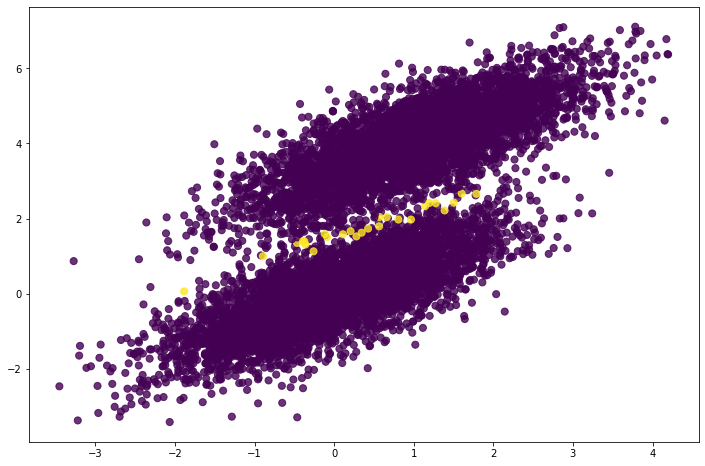

In [42]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)

Purple points are correct predictions while the yellow is the incorrect predictions which is all in the middle between the clusters.

## Conclusion
Well that was fun. From this I learnt more about Logistic Regression, how to code it in a way, while comparing it with sklearn. Obviously sklearn be more efficient while this one is slower because they use a highly optimised solver. But yeah this is just to learn more about Machine Learning. Not for use cause it's slow.